In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi

data_folder = "./data.csv-11-UC3.3508009"
lines_file = os.path.join(data_folder, "lines.csv")
payment_file = os.path.join(data_folder, "payment.csv")
payments = pd.read_csv(payment_file, delimiter=";", parse_dates=["Z_ERSTELLUNG"])
payments = payments.rename(columns={"Z_ERSTELLUNG": "Cash-Desk-Closing"})
payments = payments.rename(columns={"ZAHLART_NAME": "Payment-Method"})
payments = payments.rename(columns={"Z_ZAHLART_BETRAG": "Amount"})
lines = pd.read_csv(lines_file, delimiter=";", parse_dates=["Z_ERSTELLUNG"])
lines = lines.rename(columns={"Z_ERSTELLUNG": "Cash-Desk-Closing"})
lines = lines.rename(columns={"ARTIKELTEXT": "Item"})
lines = lines.rename(columns={"BON_ID": "Receipt ID"})

payments_styled = payments.iloc[6:9, [1, 4, 5]]
dfi.export(payments_styled, 'payments.png')

lines_styled = lines.iloc[301:306, [1, 3, 6]]
dfi.export(lines_styled, 'lines.png')



In [14]:

### Correlation of Baur sales and public holidays

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_folder = "./data.csv-13-UC3.3527280-2019"
lines_file = os.path.join(data_folder, "lines.csv")
payment_file = os.path.join(data_folder, "payment.csv")
holidays_file = os.path.join("./", "Feiertage_Bayern.csv")

lines = pd.read_csv(lines_file, delimiter=";", parse_dates=["Z_ERSTELLUNG"])
lines = lines.rename(columns={"Z_ERSTELLUNG": "datetime"})

payments = pd.read_csv(payment_file, delimiter=";", parse_dates=["Z_ERSTELLUNG"])
payments = payments.rename(columns={"Z_ZAHLART_BETRAG": "amount"})
payments = payments.rename(columns={"Z_ERSTELLUNG": "datetime"})
payments = payments.groupby(["datetime"]).sum("amount").reset_index()

vacation_format = lambda s: datetime.datetime.strptime(s,'%d.%m.%Y')
holidays = pd.read_csv(holidays_file, delimiter=";", parse_dates=["Tag"], date_parser=vacation_format)
holidays = holidays.rename(columns={"Tag": "datetime"})

x = payments['datetime']
y = payments['amount']
z = holidays["datetime"]

plt.plot(x, y, 'b+', linestyle='dashed')
for i in range(len(holidays["datetime"])):
    plt.plot(z[i], y[i], 'r+', mew=10, ms=10)
plt.gcf().autofmt_xdate()

#plt.show()
plt.savefig("./sales2021-cash11.png")

ModuleNotFoundError: No module named 'sklearn'

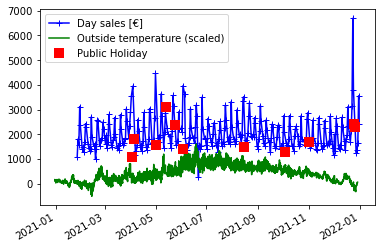

In [16]:
### Correlation of Baur sales and public holidays

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

data_folder = "./data.csv-11-UC3.3508009"
lines_file = os.path.join(data_folder, "lines.csv")
payment_file = os.path.join(data_folder, "payment.csv")
holidays_file = os.path.join("./", "Feiertage_Bayern.csv")
weather_file = os.path.join("./", "temperatureReddelich.csv")

lines = pd.read_csv(lines_file, delimiter=";", parse_dates=["Z_ERSTELLUNG"])
lines = lines.rename(columns={"Z_ERSTELLUNG": "datetime"})

payments = pd.read_csv(payment_file, delimiter=";", parse_dates=["Z_ERSTELLUNG"])
payments = payments.rename(columns={"Z_ZAHLART_BETRAG": "amount"})
payments = payments.rename(columns={"Z_ERSTELLUNG": "datetime"})
payments = payments.groupby(["datetime"]).sum("amount").reset_index()
payments.set_index('datetime')

vacation_format = lambda s: datetime.strptime(s,'%d.%m.%Y')
holidays = pd.read_csv(holidays_file, delimiter=";", parse_dates=["Tag"], date_parser=vacation_format)
holidays = holidays.rename(columns={"Tag": "datetime"})

weather_format = lambda s: datetime.strptime(s,'%Y-%m.-%d')
weather = pd.read_csv(weather_file, delimiter=",", parse_dates=["theDate"])
weather = weather.rename(columns={"theDate": "datetime"})
weather = weather.rename(columns={"outTempC": "tmax"})

x = payments['datetime']
y = payments['amount']
z = holidays["datetime"]

x_lin = np.arange(payments['datetime'].size)
fit = np.polyfit(x_lin, payments['amount'], deg=4)
fit_function = np.poly1d(fit)

mask = (weather['datetime'] > "2020-12-31")
weather = weather.loc[mask]
tmax = weather["tmax"]


plt.plot(x, y, 'b+', linestyle='solid', label="Day sales [€]")
plt.plot(weather['datetime'], tmax*40, 'g', linestyle='solid', label="Outside temperature (scaled)")
#plt.plot(x, fit_function(x_lin), 'b+', linestyle='dashed', mew=5, ms=5)
for i in range(len(holidays["datetime"])):
    if i == 0:
        plt.plot(z[i], y[i], 'r+', mew=10, ms=10, label="Public Holiday")
    else: 
        plt.plot(z[i], y[i], 'r+', mew=10, ms=10)
plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()

plt.savefig("./sales_weather_holidays.png")

In [ ]:
# execute the one above first

from statsmodels.tsa.seasonal import seasonal_decompose

payments.index = pd.to_datetime(payments["datetime"])
result=seasonal_decompose(payments['amount'], model='additive', period=12)
result.plot()



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi
from scipy import integrate

data_folder_2020 = "./data.csv-8-UC3.3527270-2020"
lines_file_2020 = os.path.join(data_folder_2020, "lines.csv")
payment_file_2020 = os.path.join(data_folder_2020, "payment.csv")

data_folder_2021 = "./data.csv-11-UC3.3508009"
lines_file_2021 = os.path.join(data_folder_2021, "lines.csv")
payment_file_2021 = os.path.join(data_folder_2021, "payment.csv")

payments = pd.concat([pd.read_csv(f, delimiter=";", parse_dates=["Z_ERSTELLUNG"]) for f in [payment_file_2020, payment_file_2021]])
payments = payments.rename(columns={"Z_ZAHLART_BETRAG": "amount"})
payments = payments.rename(columns={"Z_ERSTELLUNG": "datetime"})
payments = payments.groupby(["datetime"]).sum("amount").reset_index()

x = payments['datetime']
y = payments['amount']
print(len(y))
#y[0:318] = y[0:318]*0.7
z = integrate.cumtrapz(y, None)

print(np.sum(y))
plt.plot(x.loc[1:], z)
#plt.step(x,y*100)
#plt.show()

#payments.apply(lambda g: integrate.trapz(g.amount, x=g.datetime))
#payments.apply(lambda g: integrate.trapezoid(g["amount"], x=None, dx=1.0))

#plt.plot(x, y, 'b+', linestyle='dashed')

#x_lin = np.arange(payments['datetime'].size)
#fit = np.polyfit(x_lin, payments['amount'], deg=2)
#fit_function = np.poly1d(fit)
#plt.plot(x, fit_function(x_lin), 'b+', linestyle='dashed', mew=5, ms=5)

#y_int = integrate.cumtrapz(y, x, initial=10)
#plt.plot(x, y_int)




In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dataframe_image as dfi
from datetime import datetime, timedelta
#import statsmodels as sm
import statsmodels.api as sm
#from statsmodels.api import OLS
#from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from fbprophet import Prophet

data_folder_2020 = "./data.csv-8-UC3.3527270-2020"
lines_file_2020 = os.path.join(data_folder_2020, "lines.csv")
payment_file_2020 = os.path.join(data_folder_2020, "payment.csv")

data_folder_2021 = "./data.csv-11-UC3.3508009"
lines_file_2021 = os.path.join(data_folder_2021, "lines.csv")
payment_file_2021 = os.path.join(data_folder_2021, "payment.csv")

payments = pd.concat([pd.read_csv(f, delimiter=";", parse_dates=["Z_ERSTELLUNG"]) for f in [payment_file_2020, payment_file_2021]])
payments = payments.rename(columns={"Z_ZAHLART_BETRAG": "amount"})
payments = payments.rename(columns={"Z_ERSTELLUNG": "datetime"})
payments = payments.groupby(["datetime"]).sum("amount").reset_index()


x = payments['datetime']
print(x)
x_1 = pd.to_datetime(x, format="%Y-%m-%d", errors="coerce")
payments.set_index("datetime", inplace=True)
y = payments['amount']
y_1 = pd.Series(y, index=x_1)
#index= x
data = pd.DataFrame({
   'Y': y
}, index=x)

#arima_mod = ARIMA(endog=data, order=(5,0,1), freq='Y').fit()

#arima_mod.predict('2020-01-05T07:55:57', '2021-12-24T12:17:18', dynamic=True) # fails

#model = ARIMA(payments, order=(0, 0, 1))

#mod = ar_select_order(x, maxlag=3, old_names=False, seasonal=True)
#model = AutoReg(x, lags=mod.ar_lags, old_names=False).fit()

              datetime  Z_KASSE_ID  Z_NR   amount  Unnamed: 6
0  2022-01-03 19:08:48    17684615  1165  1994.26         0.0
1  2022-01-04 19:15:33    17684615  1175  1833.27         0.0
2  2022-01-05 19:09:38    17684615  1185  1768.02         0.0
3  2022-01-06 19:11:28    17684615  1200  2525.86         0.0
4  2022-01-07 19:10:51    21221538  1452  3941.87         0.0
5  2022-01-08 16:08:02    21221538  1464  3344.33         0.0
6  2022-01-10 19:08:25    17684615  1235  1960.77         0.0
7  2022-01-11 19:08:02    21221538  1500  2336.51         0.0
8  2022-01-12 19:09:38    17684615  1265  2057.90         0.0
9  2022-01-13 19:19:48    21221538  1536  2076.18         0.0
10 2022-01-14 14:55:42    17684615  1290  2476.01         0.0
11 2022-01-14 19:12:04    17684615  1295  1421.41         0.0
12 2022-01-15 16:19:29    24758461  1834  3272.71         0.0
14 2022-01-17 19:08:34    17684615  1325  1621.99         0.0
15 2022-01-18 19:13:53    21221538  1608  2149.60         0.0
16 2022-

C:\Users\darka\AppData\Local\Temp\ipykernel_10128\78114337.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (payments['y'])[0:318] = (payments['y'])[0:318]*0.6
C:\Users\darka\AppData\Local\Temp\ipykernel_10128\78114337.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (payments['y'])[319:636] = (payments['y'])[319:636]*0.7
C:\ProgramData\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Anaconda3\envs\f

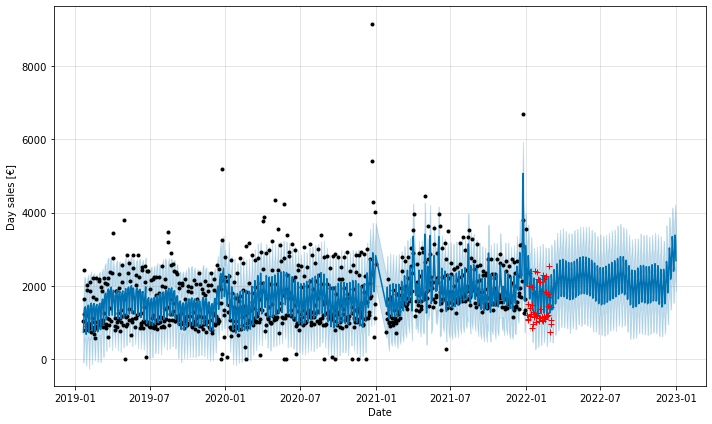

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from fbprophet import Prophet
from fbprophet.plot import plot_yearly
from fbprophet.plot import add_changepoints_to_plot

data_folder_2019 = "./data.csv-13-UC3.3527280-2019"
lines_file_2019 = os.path.join(data_folder_2019, "lines.csv")
payment_file_2019 = os.path.join(data_folder_2019, "payment.csv")

#data_folder_2020 = "././data.csv-11-UC3.3508009-2020"
data_folder_2020 = "./data.csv-8-UC3.3527270-2020"
lines_file_2020 = os.path.join(data_folder_2020, "lines.csv")
payment_file_2020 = os.path.join(data_folder_2020, "payment.csv")

data_folder_2021 = "./data.csv-11-UC3.3508009"
lines_file_2021 = os.path.join(data_folder_2021, "lines.csv")
payment_file_2021 = os.path.join(data_folder_2021, "payment.csv")

data_folder_2022 = "./UC3.3536923"
lines_file_2022 = os.path.join(data_folder_2022, "lines.csv")
payment_file_2022 = os.path.join(data_folder_2022, "payment.csv")
payments2022 = pd.read_csv(payment_file_2022, delimiter=";", parse_dates=["Z_ERSTELLUNG"])
payments2022 = payments2022.rename(columns={"Z_ZAHLART_BETRAG": "amount"})
payments2022 = payments2022.rename(columns={"Z_ERSTELLUNG": "datetime"})
payments2022 = payments2022.groupby(["datetime"]).sum("amount").reset_index()



# drop zeros
payments2022 = payments2022[(payments2022['amount'] > 1000)]
x = payments2022['datetime']
y = payments2022['amount']*0.6
print(payments2022)

holidays_file = os.path.join("./", "Feiertage_Bayern.csv")

payments = pd.concat([pd.read_csv(f, delimiter=";", parse_dates=["Z_ERSTELLUNG"]) for f in [payment_file_2019, payment_file_2020, payment_file_2021]])
payments = payments.rename(columns={"Z_ERSTELLUNG": "ds"})
payments = payments.rename(columns={"Z_ZAHLART_BETRAG": "y"})
payments = payments.groupby(["ds"]).sum("y").reset_index()
(payments['y'])[0:318] = (payments['y'])[0:318]*0.6
(payments['y'])[319:636] = (payments['y'])[319:636]*0.7
payments['ds'] = pd.to_datetime(payments['ds'])


vacation_format = lambda s: datetime.strptime(s,'%d.%m.%Y')
holidays = pd.read_csv(holidays_file, delimiter=";", parse_dates=["Tag"], date_parser=vacation_format)
holidays = holidays.rename(columns={"Tag": "datetime"})

holidays = pd.DataFrame({
  'holiday': 'public',
  'ds': pd.to_datetime(holidays['datetime']),
  'lower_window': -4,
  'upper_window': 4,
})

#df_no_weekdays = payments[payments['ds'].dt.dayofweek < 5]
# , mcmc_samples=300
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
 holidays=holidays, seasonality_mode='additive', growth='linear')
model.fit(payments)

future = model.make_future_dataframe(periods=365, include_history=True)
#df_no_weekdays = future[future['ds'].dt.dayofweek < 5]
forecast = model.predict(future)
fig1 = model.plot(forecast, xlabel='Date', ylabel="Day sales [€]", uncertainty=True)
#a = add_changepoints_to_plot(fig1.gca(), model, forecast)
#fig2 = model.plot_components(forecast)
fig3 = plt.plot(x, y, 'r+')
plt.show()

C:\Users\darka\AppData\Local\Temp\ipykernel_9944\2918323692.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (payments['y'])[0:318] = (payments['y'])[0:318]*0.7
C:\Users\darka\AppData\Local\Temp\ipykernel_9944\2918323692.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (payments['y'])[319:636] = (payments['y'])[319:636]*0.7
C:\ProgramData\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Anaconda3\envs

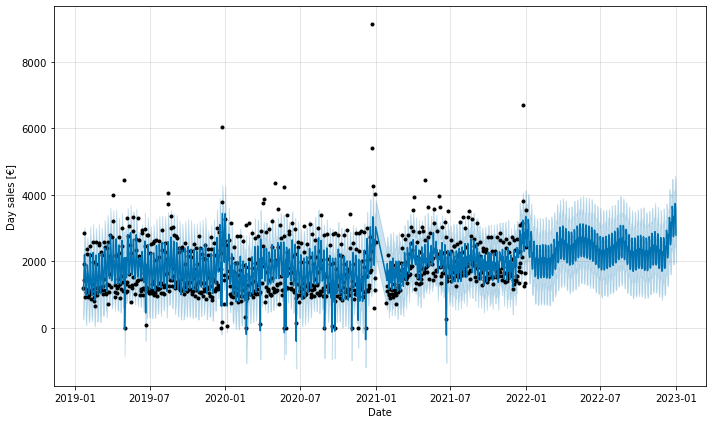

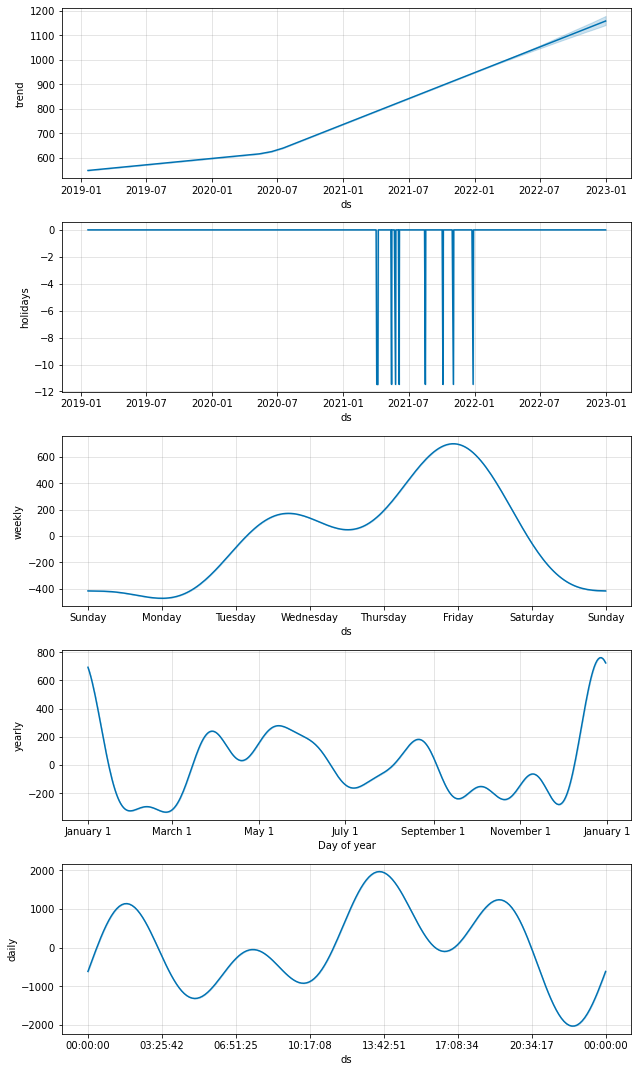

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from fbprophet import Prophet
from fbprophet.plot import plot_yearly

data_folder_2019 = "./data.csv-13-UC3.3527280-2019"
lines_file_2019 = os.path.join(data_folder_2019, "lines.csv")
payment_file_2019 = os.path.join(data_folder_2019, "payment.csv")

data_folder_2020 = "./data.csv-8-UC3.3527270-2020"
lines_file_2020 = os.path.join(data_folder_2020, "lines.csv")
payment_file_2020 = os.path.join(data_folder_2020, "payment.csv")

data_folder_2021 = "./data.csv-11-UC3.3508009"
lines_file_2021 = os.path.join(data_folder_2021, "lines.csv")
payment_file_2021 = os.path.join(data_folder_2021, "payment.csv")

holidays_file = os.path.join("./", "Feiertage_Bayern.csv")

payments = pd.concat([pd.read_csv(f, delimiter=";", parse_dates=["Z_ERSTELLUNG"]) for f in [payment_file_2019, payment_file_2020, payment_file_2021]])
payments = payments.rename(columns={"Z_ERSTELLUNG": "ds"})
payments = payments.rename(columns={"Z_ZAHLART_BETRAG": "y"})
payments = payments.groupby(["ds"]).sum("y").reset_index()
(payments['y'])[0:318] = (payments['y'])[0:318]*0.7
(payments['y'])[319:636] = (payments['y'])[319:636]*0.7
payments['ds'] = pd.to_datetime(payments['ds'])

vacation_format = lambda s: datetime.strptime(s,'%d.%m.%Y')
holidays = pd.read_csv(holidays_file, delimiter=";", parse_dates=["Tag"], date_parser=vacation_format)
holidays = holidays.rename(columns={"Tag": "datetime"})

holidays = pd.DataFrame({
  'holiday': 'public',
  'ds': pd.to_datetime(holidays['datetime']),
  'lower_window': 0,
  'upper_window': 1,
})

model = Prophet(yearly_seasonality=True, holidays=holidays, seasonality_mode='additive', growth='linear')
model.fit(payments)

future = model.make_future_dataframe(periods=365, include_history=True)
forecast = model.predict(future)
fig1 = model.plot(forecast, xlabel='Date', ylabel="Day sales [€]", uncertainty=True)
fig2 = model.plot_components(forecast)
plt.show()


In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from fbprophet import Prophet
from fbprophet.plot import plot_yearly
from fbprophet.plot import add_changepoints_to_plot

data_folder_2019 = "./data.csv-13-UC3.3527280-2019"
lines_file_2019 = os.path.join(data_folder_2019, "lines.csv")
payment_file_2019 = os.path.join(data_folder_2019, "payment.csv")

#data_folder_2020 = "././data.csv-11-UC3.3508009-2020"
data_folder_2020 = "./data.csv-8-UC3.3527270-2020"
lines_file_2020 = os.path.join(data_folder_2020, "lines.csv")
payment_file_2020 = os.path.join(data_folder_2020, "payment.csv")

data_folder_2021 = "./data.csv-11-UC3.3508009"
lines_file_2021 = os.path.join(data_folder_2021, "lines.csv")
payment_file_2021 = os.path.join(data_folder_2021, "payment.csv")

data_folder_2022 = "./UC3.3536923"
lines_file_2022 = os.path.join(data_folder_2022, "lines.csv")
payment_file_2022 = os.path.join(data_folder_2022, "payment.csv")
payments2022 = pd.read_csv(payment_file_2022, delimiter=";", parse_dates=["Z_ERSTELLUNG"])
payments2022 = payments2022.rename(columns={"Z_ZAHLART_BETRAG": "amount"})
payments2022 = payments2022.rename(columns={"Z_ERSTELLUNG": "datetime"})
payments2022 = payments2022.groupby(["datetime"]).sum("amount").reset_index()

# drop zeros
payments2022 = payments2022[(payments2022['amount'] > 1000)]
x = payments2022['datetime']
y = payments2022['amount']*0.6

holidays_file = os.path.join("./", "Feiertage_Bayern.csv")

payments = pd.concat([pd.read_csv(f, delimiter=";", parse_dates=["Z_ERSTELLUNG"]) for f in [payment_file_2019, payment_file_2020, payment_file_2021]])
payments = payments.rename(columns={"Z_ERSTELLUNG": "ds"})
payments = payments.rename(columns={"Z_ZAHLART_BETRAG": "y"})
payments = payments.groupby(["ds"]).sum("y").reset_index()
(payments['y'])[0:318] = (payments['y'])[0:318]*0.6
(payments['y'])[319:636] = (payments['y'])[319:636]*0.7
payments['ds'] = pd.to_datetime(payments['ds'])


vacation_format = lambda s: datetime.strptime(s,'%d.%m.%Y')
holidays = pd.read_csv(holidays_file, delimiter=";", parse_dates=["Tag"], date_parser=vacation_format)
holidays = holidays.rename(columns={"Tag": "datetime"})

holidays = pd.DataFrame({
  'holiday': 'public',
  'ds': pd.to_datetime(holidays['datetime']),
  'lower_window': -4,
  'upper_window': 4,
})

#df_no_weekdays = payments[payments['ds'].dt.dayofweek < 5]
# , mcmc_samples=300
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
 holidays=holidays, seasonality_mode='additive', growth='linear')
model.fit(payments)

future = model.make_future_dataframe(periods=365, include_history=True)
#df_no_weekdays = future[future['ds'].dt.dayofweek < 5]
forecast = model.predict(future)

display(forecast.loc[forecast['ds'] > '2022-03-01'])
# print(payments2022[payments2022['datetime'] > '2022-03-01'])


C:\Users\darka\AppData\Local\Temp\ipykernel_10128\2290370409.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (payments['y'])[0:318] = (payments['y'])[0:318]*0.6
C:\Users\darka\AppData\Local\Temp\ipykernel_10128\2290370409.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (payments['y'])[319:636] = (payments['y'])[319:636]*0.7
C:\ProgramData\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Anaconda3\en

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
950,2022-03-01 12:23:55,1993.466774,991.305591,2631.652198,1992.076658,1994.854126,-231.400519,-231.400519,-231.400519,0.0,...,10.342095,10.342095,10.342095,-241.742614,-241.742614,-241.742614,0.0,0.0,0.0,1762.066256
951,2022-03-02 12:23:55,1994.141527,1090.256160,2682.672991,1992.711955,1995.581942,-96.159567,-96.159567,-96.159567,0.0,...,133.901588,133.901588,133.901588,-230.061155,-230.061155,-230.061155,0.0,0.0,0.0,1897.981960
952,2022-03-03 12:23:55,1994.816279,1452.143787,3159.642704,1993.351610,1996.286751,312.692990,312.692990,312.692990,0.0,...,529.282913,529.282913,529.282913,-216.589923,-216.589923,-216.589923,0.0,0.0,0.0,2307.509269
953,2022-03-04 12:23:55,1995.491032,1270.578418,2982.718379,1994.009254,1996.996812,155.928773,155.928773,155.928773,0.0,...,357.340557,357.340557,357.340557,-201.411784,-201.411784,-201.411784,0.0,0.0,0.0,2151.419805
954,2022-03-05 12:23:55,1996.165784,869.727425,2532.241549,1994.640556,1997.721444,-303.859330,-303.859330,-303.859330,0.0,...,-119.217005,-119.217005,-119.217005,-184.642325,-184.642325,-184.642325,0.0,0.0,0.0,1692.306454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2022-12-27 12:23:55,2196.567274,2069.050332,3713.708492,2170.475930,2221.980384,691.834520,691.834520,691.834520,0.0,...,10.342095,10.342095,10.342095,681.492425,681.492425,681.492425,0.0,0.0,0.0,2888.401794
1252,2022-12-28 12:23:55,2197.242026,2181.599494,3833.184588,2171.097022,2222.755367,807.487273,807.487273,807.487273,0.0,...,133.901588,133.901588,133.901588,673.585685,673.585685,673.585685,0.0,0.0,0.0,3004.729299
1253,2022-12-29 12:23:55,2197.916779,2516.994006,4261.836738,2171.718445,2223.612993,1188.421075,1188.421075,1188.421075,0.0,...,529.282913,529.282913,529.282913,659.138162,659.138162,659.138162,0.0,0.0,0.0,3386.337854
1254,2022-12-30 12:23:55,2198.591531,2363.214994,4038.325395,2172.248030,2224.467572,995.717307,995.717307,995.717307,0.0,...,357.340557,357.340557,357.340557,638.376750,638.376750,638.376750,0.0,0.0,0.0,3194.308838
